<a href="https://colab.research.google.com/github/SoheliPaul/LLM/blob/main/2348561_LLM_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

#Model
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

#Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [16]:
question = '''What is the significance of the Great Wall of China?'''

paragraph = ''' The Great Wall of China is one of the most remarkable achievements of ancient engineering and a symbol of China's historical strength and perseverance.
                It was originally conceived by Emperor Qin Shi Huang in the third century B.C. as a means of preventing incursions from barbarian nomads. The Great Wall is
                not a single, continuous wall but rather a series of walls and fortifications that were built, rebuilt, and maintained between the 5th century BC and the
                16th century to protect the northern borders of the Chinese Empire. The wall stretches across deserts, mountains, and plateaus, covering approximately
                13,170 miles (21,196 kilometers) and is a testament to the incredible labor and dedication of the millions of workers who constructed it. Besides its
                military purpose, the Great Wall also facilitated trade and the transport of goods along the Silk Road, contributing to the economic and cultural development
                of China. Over the centuries, the wall has been a source of inspiration and pride for the Chinese people, and it continues to attract millions of tourists
                from around the world. The Great Wall is not only an architectural feat but also a cultural emblem of the enduring spirit of the Chinese civilization.'''

encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)

inputs = encoding['input_ids']  # Token embeddings
sentence_embedding = encoding['token_type_ids']  # Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs)  # Input tokens

In [18]:
input_ids = torch.tensor([inputs])
token_type_ids = torch.tensor([sentence_embedding])
outputs = model(input_ids=input_ids, token_type_ids=token_type_ids)
start_scores, end_scores = outputs.start_logits, outputs.end_logits

start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer_tokens = tokens[start_index:end_index + 1]

# Combine tokens and remove '##' subword indicators
answer = tokenizer.convert_tokens_to_string(answer_tokens)

print(answer)

a symbol of china ' s historical strength and perseverance


In [19]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 a symbol of china ' s historical strength and perseverance


**Changing the prompt to a very inquisitive and direct tone.**

In [20]:
question = '''Why the Great Wall of China?'''

encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)

inputs = encoding['input_ids']  # Token embeddings
sentence_embedding = encoding['token_type_ids']  # Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs)  # Input tokens

In [21]:
input_ids = torch.tensor([inputs])
token_type_ids = torch.tensor([sentence_embedding])
outputs = model(input_ids=input_ids, token_type_ids=token_type_ids)
start_scores, end_scores = outputs.start_logits, outputs.end_logits

start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer_tokens = tokens[start_index:end_index + 1]

# Combine tokens and remove '##' subword indicators
answer = tokenizer.convert_tokens_to_string(answer_tokens)

print(answer)

a symbol of china ' s historical strength and perseverance


In [22]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 a symbol of china ' s historical strength and perseverance


**Some other example**

In [23]:
question = '''What did the rabbit take out from its waistcoat-pocket?'''

paragraph = ''' Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister
                was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?' So she was
                considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be
                worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so very remarkable in that;
                nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it
                occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a Watch out of its
                waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with
                either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see
                it pop down a large rabbit-hole under the hedge.'''

encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)

inputs = encoding['input_ids']  # Token embeddings
sentence_embedding = encoding['token_type_ids']  # Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs)  # Input tokens

In [24]:
input_ids = torch.tensor([inputs])
token_type_ids = torch.tensor([sentence_embedding])
outputs = model(input_ids=input_ids, token_type_ids=token_type_ids)
start_scores, end_scores = outputs.start_logits, outputs.end_logits
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer_tokens = tokens[start_index:end_index + 1]

# Combine tokens and remove '##' subword indicators
answer = tokenizer.convert_tokens_to_string(answer_tokens)

print(answer)

a watch


In [25]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 a watch


**Changing the prompt to a very inquisitive and direct tone.**

In [26]:
question = '''Alice tired why?'''

paragraph = ''' Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister
                was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?' So she was
                considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be
                worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so very remarkable in that;
                nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it
                occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a Watch out of its
                waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with
                either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see
                it pop down a large rabbit-hole under the hedge.'''

encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)

inputs = encoding['input_ids']  # Token embeddings
sentence_embedding = encoding['token_type_ids']  # Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs)  # Input tokens

In [27]:
input_ids = torch.tensor([inputs])
token_type_ids = torch.tensor([sentence_embedding])
outputs = model(input_ids=input_ids, token_type_ids=token_type_ids)
start_scores, end_scores = outputs.start_logits, outputs.end_logits
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer_tokens = tokens[start_index:end_index + 1]

# Combine tokens and remove '##' subword indicators
answer = tokenizer.convert_tokens_to_string(answer_tokens)

print(answer)

sitting by her sister on the bank , and of having nothing to do


In [28]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 sitting by her sister on the bank , and of having nothing to do


***the model is able to provide accurate answers regardless of whether the question is posed in a formal, academic tone or in a more casual, inquisitive manner. This showcases the model's versatility and capability to understand and respond effectively to different types of queries.***

**Now Trying the same prompt in Chatgpt**

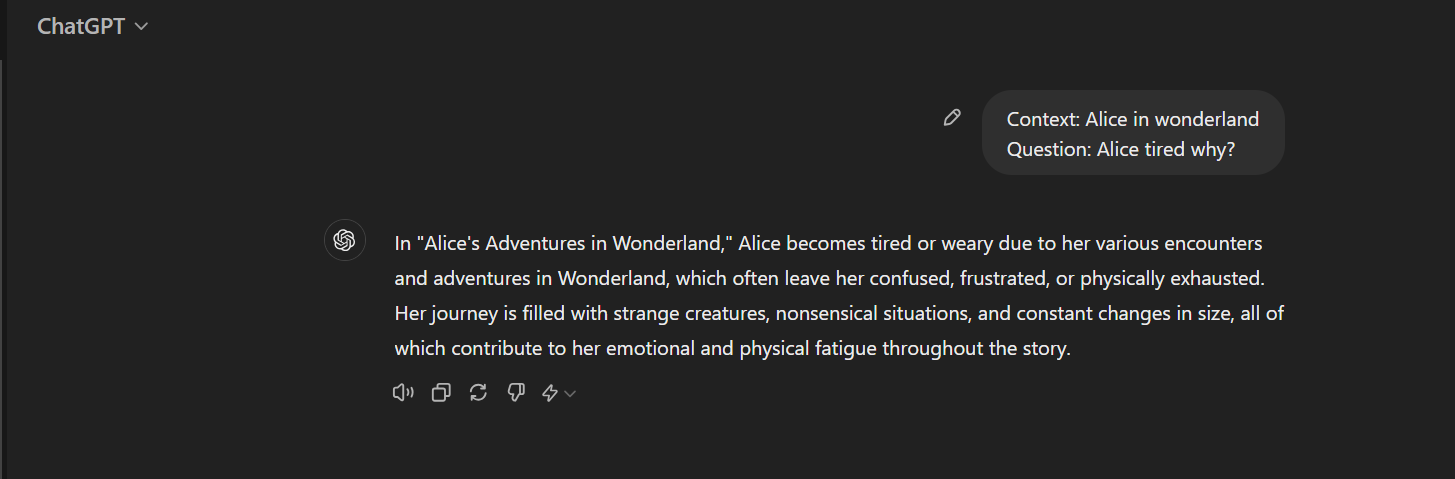

*We can see that the answer is not precise like the Bert model.*

**Now Trying the same prompt in Gemini**

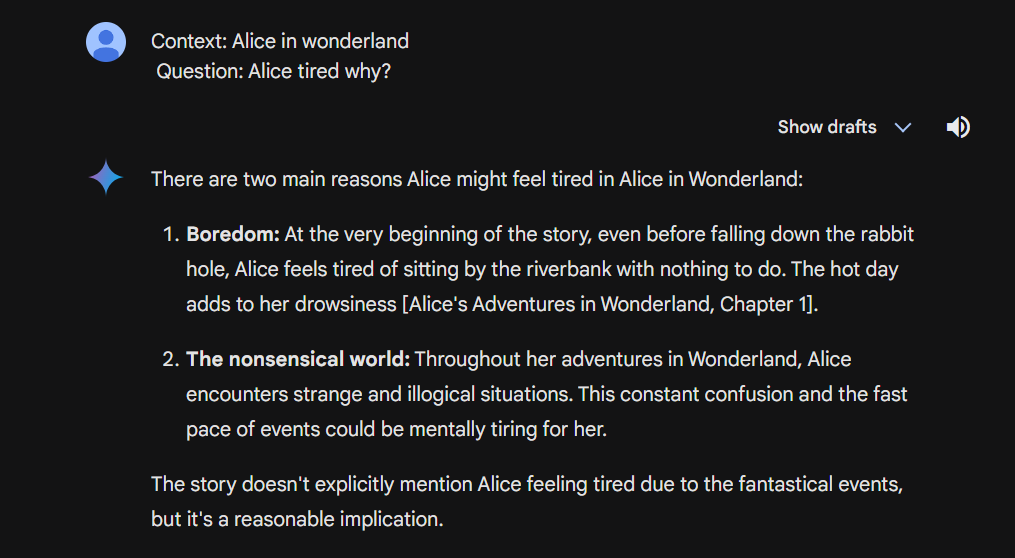

*Gemini did answer it correctly.*

# Another Example

In [31]:
paragraph = '''New Cooch Behar railway station (NCB): Located around 5 km from the city, it is well connected to almost all major Indian cities including Kolkata, Delhi, Mumbai, Bangalore, Chennai, Guwahati. All Rajdhani, superfast and express trains going towards northeast India have a stoppage here. New Cooch Behar station came up when the broad gauge New Jalpaiguri–New Bongaigaon section of Barauni–Guwahati line was laid in 1966.[54] As of 2018, it is the largest railway junction of Northeast Frontier Railway with six routes towards New Changrabandha, New Jalpaiguri, New Bongaigaon, Alipurduar Junction, Dhubri, and Bamanhat. New Cooch Behar railway station boasts a beautiful look similar to Cooch Behar Palace.[55] This station is equipped with Wi-Fi facilities, restrooms, food cafes, dormitories, waiting lounge elevators and escalators.'''
question = "What is NCB?"

encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)

inputs = encoding['input_ids']  # Token embeddings
sentence_embedding = encoding['token_type_ids']  # Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs)  # Input tokens

input_ids = torch.tensor([inputs])
token_type_ids = torch.tensor([sentence_embedding])
outputs = model(input_ids=input_ids, token_type_ids=token_type_ids)
start_scores, end_scores = outputs.start_logits, outputs.end_logits
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer_tokens = tokens[start_index:end_index + 1]

# Combine tokens and remove '##' subword indicators
answer = tokenizer.convert_tokens_to_string(answer_tokens)

print(answer)

new cooch behar railway station


In [32]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 new cooch behar railway station


**ChatGPT**

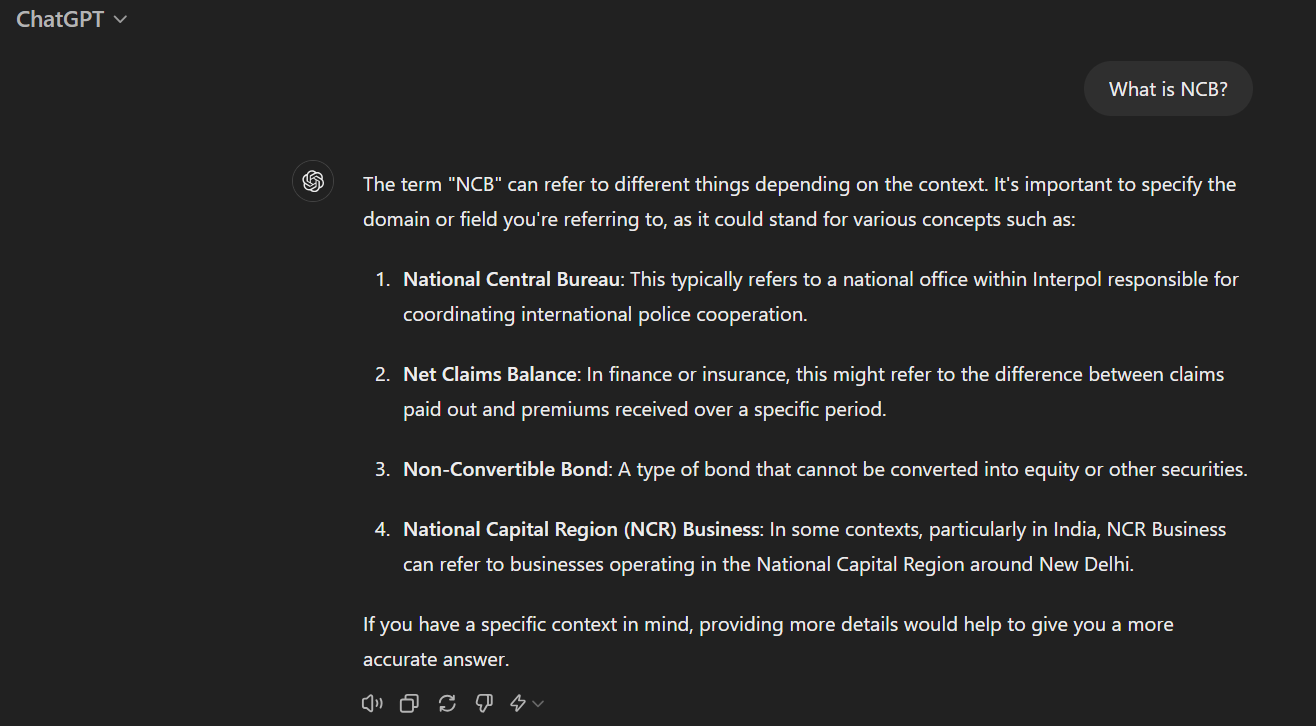

*ChatGPT is confused.*

**Gemini**

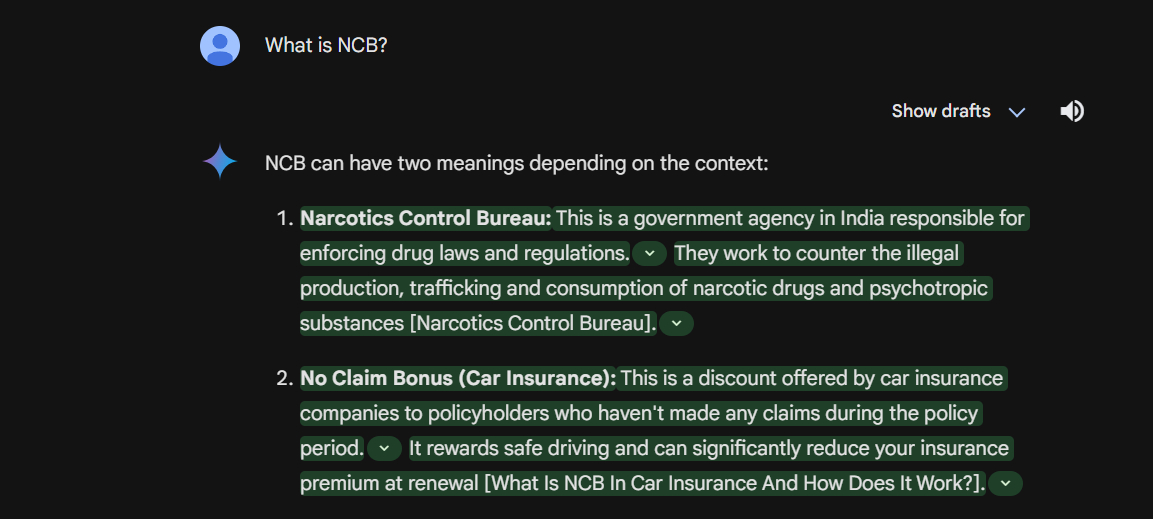

*Gemini is also confused.*

# Let's try a new prompt "NCB stands for New CoochBehar Railway Station. So, can you tell me something about that railway station." for ChatGPT and Gemini.

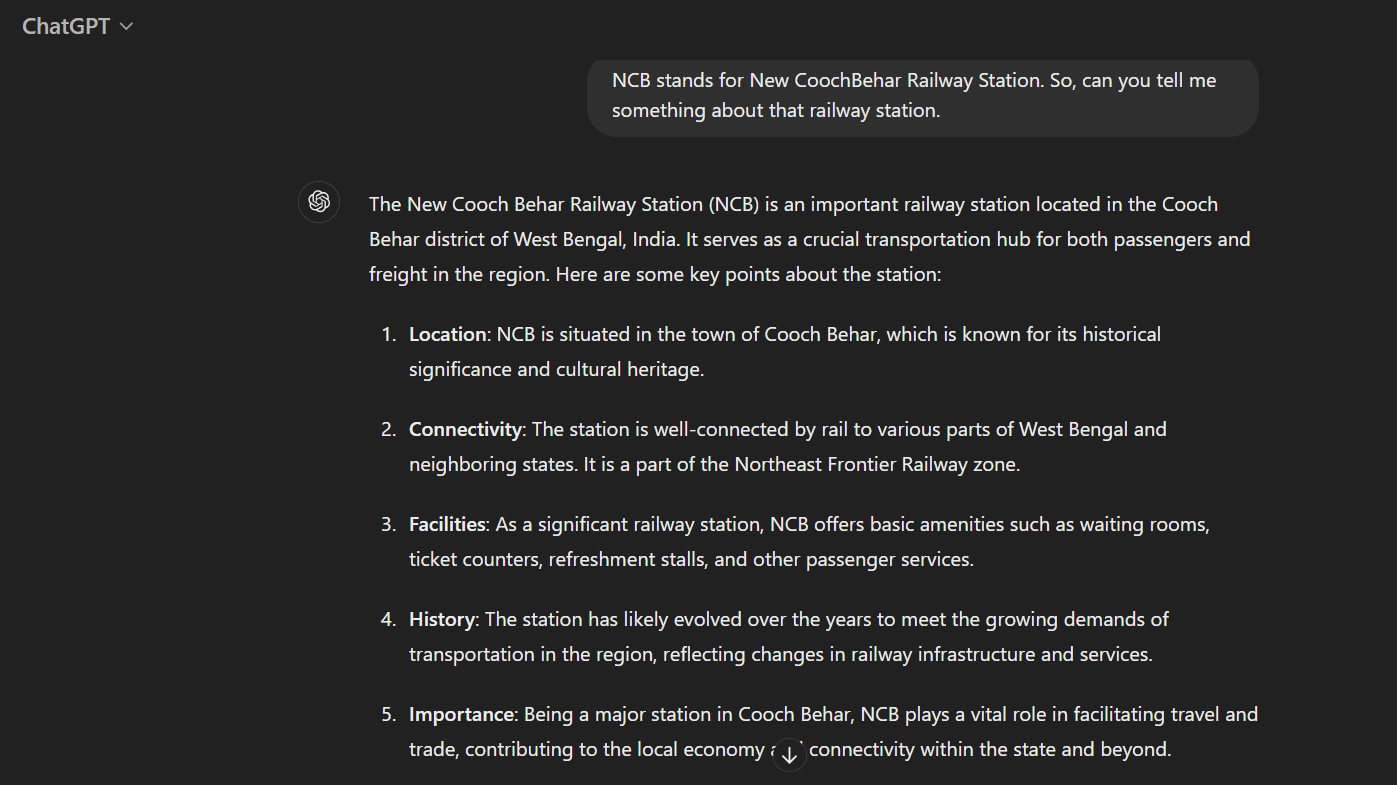

**Finally, ChatGPT giving facts.**

Gemini

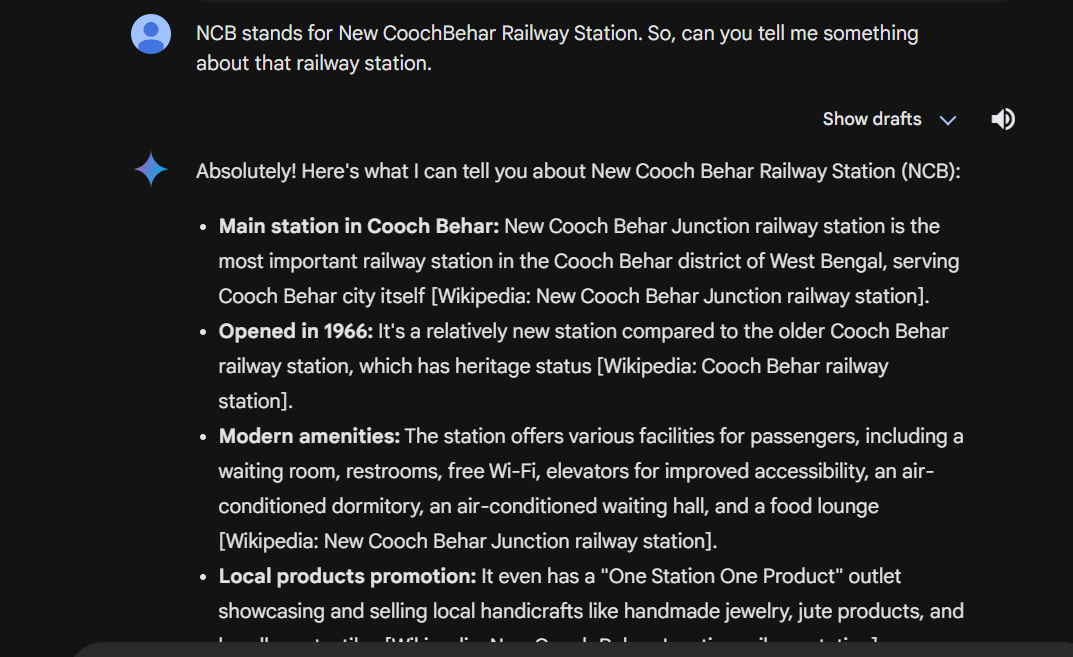

**The importance of providing a clear and accurate prompt is crucial for receiving the desired information. In the example you mentioned:**

*Confusing Prompt: "What is NCB?" initially led to confusion because NCB can have multiple meanings depending on the context.*

*Clear Prompt: When you clarified with "NCB stands for New CoochBehar Railway Station. So, can you tell me something about that railway station," it provided specific context and allowed for a precise and relevant response.*

**Therefore, using clear and specific prompts helps ensure that the information provided meets your expectations and accurately addresses your query. This approach minimizes misunderstandings and improves the efficiency of communication.**